**NBA VERİ SETLERİ İLE ANALİZ**

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

- **Games details** veri seti; oyun numarası, takım numarası, hücum ribaundları, serbest atışlar vb gibi bilgileri barındıran,oynanan maçlar hakkında detaylı verilerin bulunduğu bir veri setidir.
- **Games veri seti**; bir maçtaki ev sahibi takım numarasını, deplasman takım numarasını, deplasman ve ev sahibi takımın puanlarını, yaptıkları serbest atış veya ribaundları bulunduran bir veri setidir.
- **Players veri seti**; bir oyuncuyu tanımlayan verileri bulunduran veri setidir.
- **Ranking veri seti**; takımların kazandığı veya kaybettiği maç sayısı vb gibi bilgilerin bulunduğu veri setidir.
- **Teams veri seti**; takımların kısaltmalarının, arena kapasitelerinin, takım kurucularının bulunduğu bir veri setidir.

In [2]:
df_games_details = pd.read_csv("games_details.csv", low_memory=False)
df_games = pd.read_csv("games.csv")
df_players = pd.read_csv("players.csv")
df_ranking = pd.read_csv("ranking.csv")
df_teams = pd.read_csv("teams.csv")

In [3]:
print(f"Game Details datasının kolonları : {df_games_details.columns.tolist()}\n")
print(f"Game Details datasının {df_games_details.shape[0] } tane satırı, {df_games_details.shape[1] } tane sütunu vardır.\n")
df_games_details.info()

Game Details datasının kolonları : ['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']

Game Details datasının 645953 tane satırı, 29 tane sütunu vardır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            645953 non-null  int64  
 1   TEAM_ID            645953 non-null  int64  
 2   TEAM_ABBREVIATION  645953 non-null  object 
 3   TEAM_CITY          645953 non-null  object 
 4   PLAYER_ID          645953 non-null  int64  
 5   PLAYER_NAME        645953 non-null  object 
 6   NICKNAME           30362 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMEN

In [4]:
df_games_details.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,645953.0,2.165952e+07,5.569116e+06,1.030000e+07,2.060113e+07,2.120062e+07,2.170079e+07,5.200021e+07
TEAM_ID,645953.0,1.610613e+09,8.650314e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,645953.0,3.716935e+05,7.348620e+06,1.500000e+01,2.435000e+03,2.011560e+05,2.031240e+05,1.962938e+09
FGM,540350.0,3.582408e+00,3.023962e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,540350.0,7.891298e+00,5.665752e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,540350.0,4.162029e-01,2.516336e-01,0.000000e+00,2.630000e-01,4.290000e-01,5.710000e-01,1.000000e+00
FG3M,540350.0,7.657315e-01,1.216917e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,540350.0,2.151618e+00,2.547737e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.400000e+01
FG3_PCT,540350.0,1.991665e-01,2.894474e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e-01,1.000000e+00
FTM,540350.0,1.734931e+00,2.353475e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


In [5]:
print(f"Games datasının kolonları : {df_games.columns.tolist()}\n")
print(f"Games datasının {df_games.shape[0] } tane satırı, {df_games.shape[1] } tane sütunu vardır.\n")
df_games.info()

Games datasının kolonları : ['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']

Games datasının 25796 tane satırı, 21 tane sütunu vardır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25

In [6]:
df_games.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,25796.0,2.169208e+07,5.496041e+06,1.030000e+07,2.060109e+07,2.120040e+07,2.170070e+07,5.200021e+07
HOME_TEAM_ID,25796.0,1.610613e+09,8.638857e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,25796.0,1.610613e+09,8.654846e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,25796.0,2.011798e+03,5.397985e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.016000e+03,2.021000e+03
TEAM_ID_home,25796.0,1.610613e+09,8.638857e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,25697.0,1.031060e+02,1.317473e+01,3.600000e+01,9.400000e+01,1.030000e+02,1.120000e+02,1.680000e+02
FG_PCT_home,25697.0,4.603128e-01,5.662854e-02,2.500000e-01,4.210000e-01,4.590000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,25697.0,7.597049e-01,1.006920e-01,1.430000e-01,6.960000e-01,7.650000e-01,8.290000e-01,1.000000e+00
FG3_PCT_home,25697.0,3.558964e-01,1.119400e-01,0.000000e+00,2.860000e-01,3.550000e-01,4.290000e-01,1.000000e+00
AST_home,25697.0,2.273678e+01,5.177566e+00,6.000000e+00,1.900000e+01,2.300000e+01,2.600000e+01,5.000000e+01


In [7]:
print(f"Players datasının kolonları : {df_players.columns.tolist()}\n")
print(f"Players datasının {df_players.shape[0] } tane satırı, {df_players.shape[1] } tane sütunu vardır.\n")
df_players.info()

Players datasının kolonları : ['PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON']

Players datasının 7228 tane satırı, 4 tane sütunu vardır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


In [8]:
df_players.describe().T

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,7228.0,1.610613e+09,8.723521e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,7228.0,2.355862e+06,6.106688e+07,2.440000e+02,2.007680e+05,2.023465e+05,2.039100e+05,1.962938e+09
SEASON,7228.0,2.014160e+03,3.126216e+00,2.009000e+03,2.012000e+03,2.014000e+03,2.017000e+03,2.019000e+03


In [9]:
print(f"Ranking datasının kolonları : {df_ranking.columns.tolist()}\n")
print(f"Ranking datasının {df_ranking.shape[0] } tane satırı, {df_ranking.shape[1] } tane sütunu vardır.\n")
df_ranking.info()

Ranking datasının kolonları : ['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE', 'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD', 'RETURNTOPLAY']

Ranking datasının 201792 tane satırı, 13 tane sütunu vardır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201792 entries, 0 to 201791
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        201792 non-null  int64  
 1   LEAGUE_ID      201792 non-null  int64  
 2   SEASON_ID      201792 non-null  int64  
 3   STANDINGSDATE  201792 non-null  object 
 4   CONFERENCE     201792 non-null  object 
 5   TEAM           201792 non-null  object 
 6   G              201792 non-null  int64  
 7   W              201792 non-null  int64  
 8   L              201792 non-null  int64  
 9   W_PCT          201792 non-null  float64
 10  HOME_RECORD    201792 non-null  object 
 11  ROAD_RECORD    201792 non-null  object 
 12  RETURNTOPLAY  

In [10]:
df_players.describe().T

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,7228.0,1.610613e+09,8.723521e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,7228.0,2.355862e+06,6.106688e+07,2.440000e+02,2.007680e+05,2.023465e+05,2.039100e+05,1.962938e+09
SEASON,7228.0,2.014160e+03,3.126216e+00,2.009000e+03,2.012000e+03,2.014000e+03,2.017000e+03,2.019000e+03


In [11]:
print(f"Teams datasının kolonları : {df_teams.columns.tolist()}\n")
print(f"Teams datasının {df_teams.shape[0] } tane satırı, {df_teams.shape[1] } tane sütunu vardır.\n")
df_teams.info()

Teams datasının kolonları : ['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION', 'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER', 'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION']

Teams datasının 30 tane satırı, 14 tane sütunu vardır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null

In [12]:
df_teams.describe().T

,count,mean,std,min,25%,50%,75%,max
LEAGUE_ID,30.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TEAM_ID,30.0,1.610613e+09,8.803408,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
MIN_YEAR,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
MAX_YEAR,30.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
YEARFOUNDED,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
ARENACAPACITY,26.0,1.855331e+04,3916.923362,0.000000e+00,1.864150e+04,1.913100e+04,1.979075e+04,2.171100e+04


**Sütun İsimlerini Güncelleme**

In [13]:
df_games_details.rename(columns = {"GAME_ID": "OYUN_NO",
 "TEAM_ID" : "TAKIM_NO", 
 "TEAM_ABBREVIATION" : "TAKIM_KISALTMASI", 
 "TEAM_CITY" : "TAKIM_SEHİR", 
 "PLAYER_ID" : "OYUNCU_NO", 
 "PLAYER_NAME" : "OYUNCU_ISIM", 
 "NICKNAME" : "TAKMA_AD", 
 "START_POSITION" : "BASLANGIC_POZISYONU", 
 "COMMENT" : "OYNANAN_SURE"}, inplace= True )

In [14]:
df_games.rename(columns = {"GAME_DATE_EST" : "OYUN_TARIH_EST", 
"GAME_ID" : "OYUN_NO", 
"GAME_STATUS_TEXT" : "OYUN_DURUM", 
"HOME_TEAM_ID" : "EVSAHIBITAKIM_NO", 
"VISITOR_TEAM_ID" : "ZIYARETCITAKIM_NO", 
"SEASON" : "SEZON", 
"TEAM_ID_home" : "EVSAHIBITAKIM_NO", 
"TEAM_ID_away" : "ZIYARETCITAKIM_NO", 
"HOME_TEAM_WINS" : "EVSAHIBI_KAZANDIMI"}, inplace = True)

In [15]:
df_players.rename(columns = {"PLAYER_NAME" : "OYUNCU_ISIM", 
"TEAM_ID" : "TAKIM_NO", 
"PLAYER_ID" : "OYUNCU_NO", 
"SEASON" : "SEZON"}, inplace = True)

In [16]:
df_ranking.rename(columns = {"TEAM_ID" : "TAKIM_NO", 
"LEAGE_ID" : "LİG_NO", 
"SEASON_ID" : "SEZON_NO", 
"STANDINGSDATE" : "PUAN_DURUM_TARIHI", 
"CONFERENCE" : "KONFERANS", 
"TEAM" : "TAKIM", 
"HOME_RECORD" : "EVSAHIBI_KAYIT", 
"ROAD_RECORD" : "DEPLASMAN_KAYIT", 
"RETURNTOPLAY" : "OYUNADONUS"}, inplace = True)

In [17]:
df_teams.rename(columns = {"LEAGUE_ID" : "LIG_NO", 
"TEAM_ID" : "TAKIM_NO", 
"MIN_YEAR" : "MIN_YIL", 
"MAX_YEAR" : "MAX_YIL", 
"ABBREVIATION" : "TAKIM_KISALTMASI", 
"NICKNAME" : "TAKMA_AD", 
"YEAR_FOUNDED" : "KURULUS_YILI", 
"CITY" : "TAKIM_SEHIR", 
"ARENACAPACITY" : "ARENA_KAPASITE",
 "OWNER" : "SAHIBI", 
 "GENERALMANAGER" : "GENEL_MUDUR", 
 "HEADCOACH" : "BASANTRENOR", 
 "DLEAGUEAFFILIATION" : "D_LIG_UYELIGI" }, inplace = True)

**Ön İşleme (Preprocess)**

In [18]:
#Tamamı NaN olan sütunlar kaldırıldı.

df_games_details.dropna(how="all", axis=1, inplace=True)
df_games.dropna(how="all", axis=1, inplace=True)
df_players.dropna(how="all", axis=1, inplace=True)
df_ranking.dropna(how="all", axis=1, inplace=True)
df_teams.dropna(how="all", axis=1, inplace=True)


In [19]:
df_games.columns.tolist()

['OYUN_TARIH_EST',
 'OYUN_NO',
 'OYUN_DURUM',
 'EVSAHIBITAKIM_NO',
 'ZIYARETCITAKIM_NO',
 'SEZON',
 'EVSAHIBITAKIM_NO',
 'PTS_home',
 'FG_PCT_home',
 'FT_PCT_home',
 'FG3_PCT_home',
 'AST_home',
 'REB_home',
 'ZIYARETCITAKIM_NO',
 'PTS_away',
 'FG_PCT_away',
 'FT_PCT_away',
 'FG3_PCT_away',
 'AST_away',
 'REB_away',
 'EVSAHIBI_KAZANDIMI']

Games datasındaki Ev Sahibi Takım No ve Ziyaretçi Takım No sütunu tekrarlı idi, tekrarlı sütunlar silindi.

In [20]:
df_games = df_games.loc[:,~df_games.columns.duplicated()].copy() 

In [21]:
df_games.columns.tolist()

['OYUN_TARIH_EST',
 'OYUN_NO',
 'OYUN_DURUM',
 'EVSAHIBITAKIM_NO',
 'ZIYARETCITAKIM_NO',
 'SEZON',
 'PTS_home',
 'FG_PCT_home',
 'FT_PCT_home',
 'FG3_PCT_home',
 'AST_home',
 'REB_home',
 'PTS_away',
 'FG_PCT_away',
 'FT_PCT_away',
 'FG3_PCT_away',
 'AST_away',
 'REB_away',
 'EVSAHIBI_KAZANDIMI']

**Analiz**

**Takımların şehirleri, numaraları ve kısaltmaları ile kaç takım olduğu bulundu.**

In [22]:

df_final5 = df_teams[[ "TAKIM_NO", "TAKIM_SEHIR", "TAKIM_KISALTMASI"]]
df_final5 = df_final5.drop_duplicates(subset=['TAKIM_NO'])
print(f"Takımların kısaltmaları : \n {df_final5.TAKIM_KISALTMASI.to_list()}\n Toplam {df_final5.shape[0]} tane takım vardır.")

Takımların kısaltmaları : 
 ['ATL', 'BOS', 'NOP', 'CHI', 'DAL', 'DEN', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA', 'CLE', 'GSW']
 Toplam 30 tane takım vardır.


**Takımların ev sahibi iken maçı kazanma yüzdesi incelendi.**

In [23]:
game_num = df_games["OYUN_NO"].nunique()
hometeam_winpercent = ( (df_games["EVSAHIBI_KAZANDIMI"]).value_counts() / game_num ) * 100
print(f"Takımların ev sahibiyken oyunu kazanma ve kaybetme yüzdesi: \n{hometeam_winpercent}")

Takımların ev sahibiyken oyunu kazanma ve kaybetme yüzdesi: 
1    58.815539
0    41.297008
Name: EVSAHIBI_KAZANDIMI, dtype: float64


<AxesSubplot:ylabel='EVSAHIBI_KAZANDIMI'>

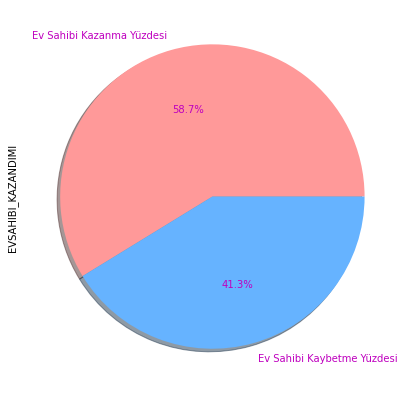

In [24]:

labels = "Ev Sahibi Kazanma Yüzdesi" , "Ev Sahibi Kaybetme Yüzdesi"
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

hometeam_winpercent.plot.pie(figsize=(7, 7), colors = colors, labels = labels, autopct='%1.1f%%', shadow = True,  textprops={'color':"m"})

**Ev sahibi takımların arenalarının büyüklüğünün maçı kazanmalarında etkisi incelendi.**

In [25]:
df_g = df_games[["EVSAHIBITAKIM_NO", "EVSAHIBI_KAZANDIMI"]]
df_g.rename(columns = {"EVSAHIBITAKIM_NO" : "TAKIM_NO"}, inplace = True)


c:\Users\90542\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [26]:
df_final = df_g.merge(df_teams, on = "TAKIM_NO", how = "inner")
df_final2 = df_final[["TAKIM_NO", "ARENA_KAPASITE", "EVSAHIBI_KAZANDIMI" , "TAKIM_KISALTMASI"]]
df_final2.drop_duplicates(subset ="TAKIM_NO",keep = "first", inplace = True)

c:\Users\90542\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [27]:
#Arena Kapasite değişkeni NaN ve 0 olan değerlerden temizlendi.
df_final2.dropna(subset=["ARENA_KAPASITE"], inplace = True) 
df_final2.drop(df_final2.index[df_final2['ARENA_KAPASITE'] == 0], inplace = True)

c:\Users\90542\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
df_win = df_final2.drop(df_final2.index[df_final2['EVSAHIBI_KAZANDIMI'] == 0])
winGame_mean = df_win["ARENA_KAPASITE"].mean()

df_lose = df_final2.drop(df_final2.index[df_final2['EVSAHIBI_KAZANDIMI'] == 1])
loseGame_mean = df_lose["ARENA_KAPASITE"].mean()

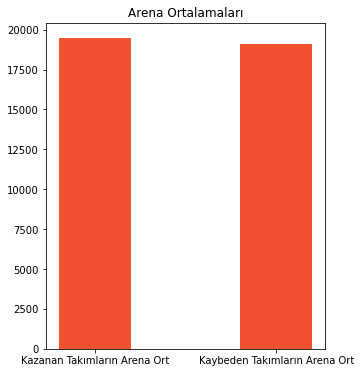

In [29]:
plt.figure(figsize=(5,6))
x = ["Kazanan Takımların Arena Ort", "Kaybeden Takımların Arena Ort"]
y = [winGame_mean, loseGame_mean]


plt.bar(x, y, color ="#f05131",width = 0.4)
plt.title("Arena Ortalamaları")

plt.show()

**Takımların arenalarının büyüklüğünün toplam puanlarına etkisi incelendi.**

In [30]:
df_g1 = df_games.rename(columns = {"EVSAHIBITAKIM_NO" : "TAKIM_NO"})

df_final = df_teams.merge(df_g1, on = "TAKIM_NO", how = "inner")

df_final = df_final[["TAKIM_NO", "ARENA_KAPASITE", "PTS_home", "TAKIM_KISALTMASI"]]
df_final.drop(df_final.index[df_final['ARENA_KAPASITE'] == 0], inplace = True)

df_final


,TAKIM_NO,ARENA_KAPASITE,PTS_home,TAKIM_KISALTMASI
0,1610612737,18729.0,112.0,ATL
1,1610612737,18729.0,130.0,ATL
2,1610612737,18729.0,127.0,ATL
3,1610612737,18729.0,124.0,ATL
4,1610612737,18729.0,121.0,ATL
...,...,...,...,...
25791,1610612744,19596.0,121.0,GSW
25792,1610612744,19596.0,127.0,GSW
25793,1610612744,19596.0,119.0,GSW
25794,1610612744,19596.0,125.0,GSW


Takım puanı ile arena büyüklüğü arasında çok sıkı olmasa da pozitif korelasyon gözlenebilir. Bu durumda arena büyüklüğü takımın topladığı puana pozitif yönde etki ediyor diyebiliriz.

<AxesSubplot:xlabel='ARENA_KAPASITE', ylabel='PTS_home'>

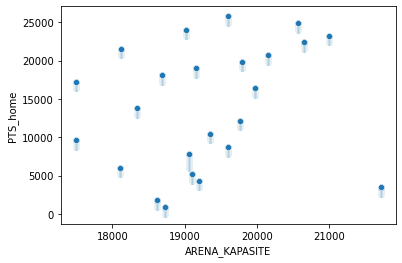

In [31]:
df_final.groupby(["TAKIM_NO", "ARENA_KAPASITE", "TAKIM_KISALTMASI"]).sum()
df_final["PTS_home"] = df_final.index

sns.scatterplot(x = "ARENA_KAPASITE", y = "PTS_home", data = df_final)


- FTM-> Denenen serbest atış sayısı.
- FTA-> Yapılan serbest atış sayısı.
- **Takımların ev sahibi iken denediği serbest atışların başarı yüzdesi incelendi.**

In [32]:

df_games2 = pd.read_csv("games.csv")
df_games_details2 = pd.read_csv("games_details.csv")


df_games2 = df_games2 [["HOME_TEAM_ID", "GAME_ID"]]
df_games2.rename(columns = {"HOME_TEAM_ID" : "TAKIM_NO"}, inplace = True) #ev sahibi takımlar alındı.
df_games_details2.rename(columns = {"TEAM_ID" : "TAKIM_NO"}, inplace = True)

df_games_details2 = df_games_details2[["FTA", "FTM", "TAKIM_NO"]]
x=0
y=20000


df_games2.loc[x:y] #games datası örneklemi daraltıldı.
df_games2.loc[x:y].index
df_games2.drop(df_games2.loc[x:y].index, inplace=True)

y=500000
df_games_details2.loc[x:y] #games details datası örneklemi daraltıldı.
df_games_details2.loc[x:y].index
df_games_details2.drop(df_games_details2.loc[x:y].index, inplace=True)

df_final = df_games2.merge(df_games_details2, on ="TAKIM_NO", how = "inner")
df_final.dropna(how = "any", inplace =True)


c:\Users\90542\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
df_final = df_final.groupby( ["TAKIM_NO" ]).sum()

df_final["TAKIM_NO"] = df_final.index
df_final["RATIO_FT"] = (df_final["FTM"] / df_final["FTA"]) * 100 #Serbest atış başarı yüzdesi hesaplandı.



                   GAME_ID        FTA        FTM    TAKIM_NO   RATIO_FT
TAKIM_NO                                                               
1610612747  14596784961512  1810608.0  1340670.0  1610612747  74.045293
1610612748  18313709885847  1895652.0  1421244.0  1610612748  74.973888
1610612749  15796359362550  1537932.0  1143326.0  1610612749  74.341778
1610612750  14527122904374  1738064.0  1340256.0  1610612750  77.112005
1610612751  15805719357785  1586465.0  1180663.0  1610612751  74.420993
1610612752  14855982841830  1367366.0  1056328.0  1610612752  77.252762
1610612753  14412561409182  1273832.0   953120.0  1610612753  74.823054
1610612754  17568281771652  1744872.0  1324064.0  1610612754  75.883159
1610612755  14705234520543  1481440.0  1037384.0  1610612755  70.025381
1610612756  14102756191364  1407298.0  1054847.0  1610612756  74.955482


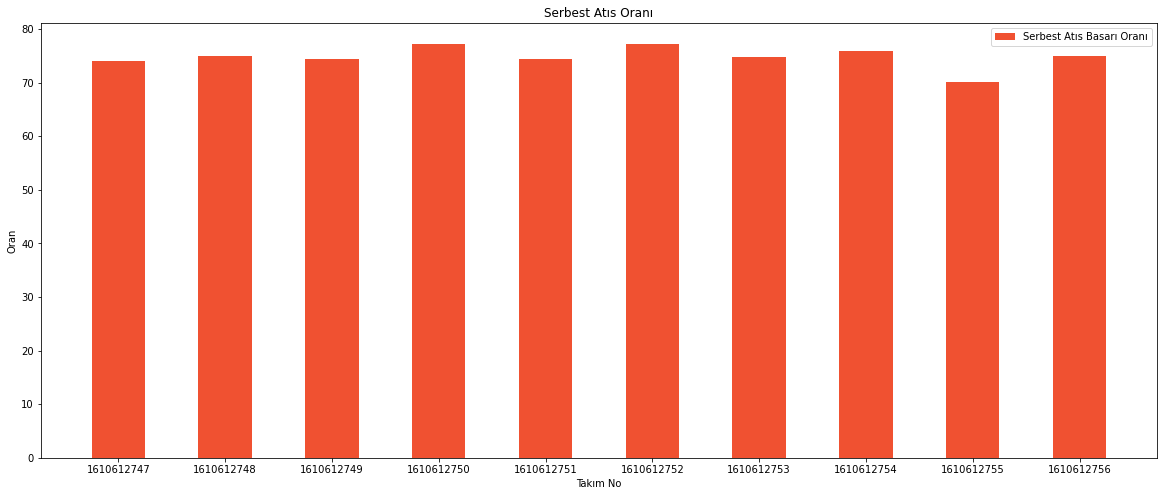

In [34]:
from matplotlib import figure
import matplotlib.pyplot as plt

df_final.TAKIM_NO = df_final.TAKIM_NO.astype(str)

df_final = df_final.iloc[10:20] #Grafik için 10 takım alındı.
print(df_final)
plt.figure(figsize=(20,8))
plt.bar(df_final.TAKIM_NO,df_final.RATIO_FT,width=0.5,color="#f05131",label="Serbest Atıs Basarı Oranı")

plt.ylabel("Oran")
plt.xlabel("Takım No")
plt.legend()
plt.title("Serbest Atıs Oranı")
plt.show()

- FGM-> Bir takımın yaptığı başarılı atış sayısı.
- FGA-> Bir takımın denediği atış sayısı.
- **Takımların denedikleri atışların başarı oranı incelendi.**

In [35]:
df_f = df_games_details.merge(df_teams, on = "TAKIM_NO", how = "inner")
df_f = df_f [["FGM", "FGA", "TAKIM_KISALTMASI_x"]]

df_f = df_f.groupby(["TAKIM_KISALTMASI_x"]).sum()
df_f

,FGM,FGA
TAKIM_KISALTMASI_x,,
ATL,64065.0,141748.0
BKN,33941.0,74795.0
BOS,67529.0,147678.0
CHA,56525.0,128507.0
CHI,63652.0,143017.0
CLE,65025.0,144409.0
DAL,66387.0,145523.0
DEN,67501.0,145977.0
DET,63433.0,142542.0


In [36]:
df_f["RATIO_THROW"] = (df_f["FGM"] / df_f["FGA"]) * 100 


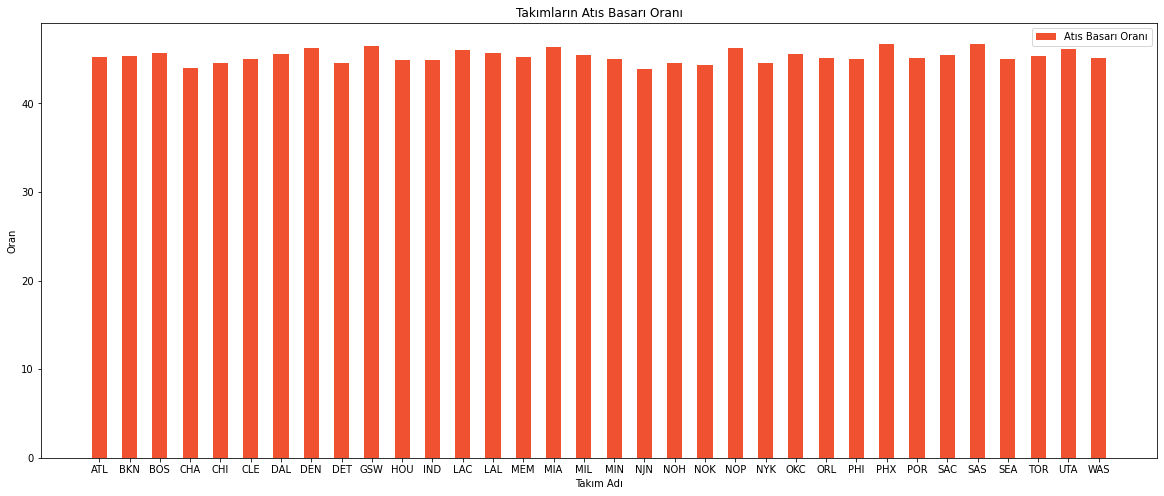

In [37]:
df_f["TAKIM_KISALTMASI"] = df_f.index

plt.figure(figsize=(20,8))
plt.bar(df_f.TAKIM_KISALTMASI,df_f.RATIO_THROW,width=0.5,color="#f05131",label="Atıs Basarı Oranı")

plt.ylabel("Oran")
plt.xlabel("Takım Adı")
plt.legend()
plt.title("Takımların Atıs Basarı Oranı")
plt.show()